In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import seaborn as sns
import pickle

from gryffin import Gryffin

sns.set(style='ticks', context='notebook')

In [2]:
# Plotting func
palette1 = ['#05668dff','#028090ff','#00a896ff','#02c39aff','#f0f3bdff']
palette2 = ['#ffa69eff','#faf3ddff','#b8f2e6ff','#aed9e0ff','#5e6472ff']

def plot_scaling(ax, x, timings, xlabel='', ylabel='', logplot=False, ts=1., color='#f0f3bdff', set_lims=False):
    
    timings = deepcopy(timings)
    average_times = [t.average*ts for t in timings]
    
    if logplot is False:
        # line
        _ = ax.plot(x, average_times, zorder=0, color='#444444', linewidth=3, linestyle='--')
        
        # scatter
        for time, xi in zip(timings, x):
            ax.scatter(xi, time.average*ts, s=200, c=color, edgecolor='#444444', linewidth=3)
            
    else:
        # line
        _ = ax.plot(np.log10(x), np.log10(average_times), zorder=0, color='#444444', 
                    linewidth=3, linestyle='--')
        
        # scatter
        for time, xi in zip(timings, x):
            ax.scatter(np.log10(xi), np.log10(time.average*ts), s=200, c=color, edgecolor='#444444', linewidth=3)
   
    _ = ax.set_xlabel(xlabel)
    _ = ax.set_ylabel(ylabel)
    
    if set_lims is True:
        if logplot is True:
            ax.set_xlim([np.log10(np.min(x)), np.log10(np.max(x))])
            ax.set_ylim([np.log10(np.min(average_times)), np.log10(np.max(average_times))])
        else:
            ax.set_xlim([np.min(x), np.max(x)])
            ax.set_ylim([np.min(average_times), np.max(average_times)])

## Timings

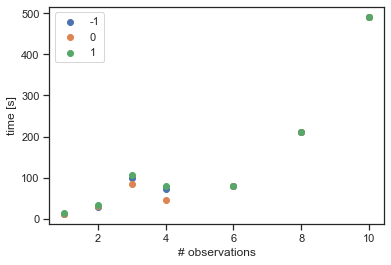

In [3]:
with open('dims-constrained-adam.pkl', 'rb') as content:
    data = pickle.load(content)

num_obs = list(data.keys())

mean_times_at_l_n1 = [np.mean(data[n][-1]) for n in num_obs]
mean_times_at_l_0 = [np.mean(data[n][0]) for n in num_obs]
mean_times_at_l_p1 = [np.mean(data[n][1]) for n in num_obs]

plt.scatter(num_obs, mean_times_at_l_n1, label='-1')
plt.scatter(num_obs, mean_times_at_l_0, label='0')
plt.scatter(num_obs, mean_times_at_l_p1, label='1')

plt.ylabel('time [s]')
plt.xlabel('# observations')
plt.legend()

Text(0.5, 0, '# observations')

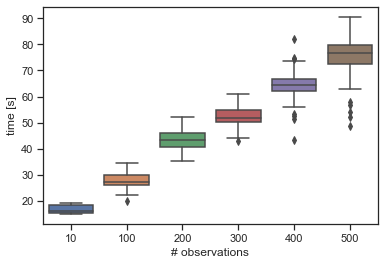

In [5]:
with open('num_obs-constrained-adam.pkl', 'rb') as content:
    data = pickle.load(content)

num_obs = list(data.keys())

df = pd.DataFrame()

for n in num_obs:
    df.loc[:, n] = np.array([data[n][l] for l in [-1,0,1]]).flatten()

sns.boxplot(data=df)
#sns.violinplot(data=df)
#sns.stripplot(data=df, zorder=0)
#sns.pointplot(data=df, join=False, markers="d", scale=1., ci=None, zorder=1000)
#sns.boxenplot(data=df)

plt.ylabel('time [s]')
plt.xlabel('# observations')

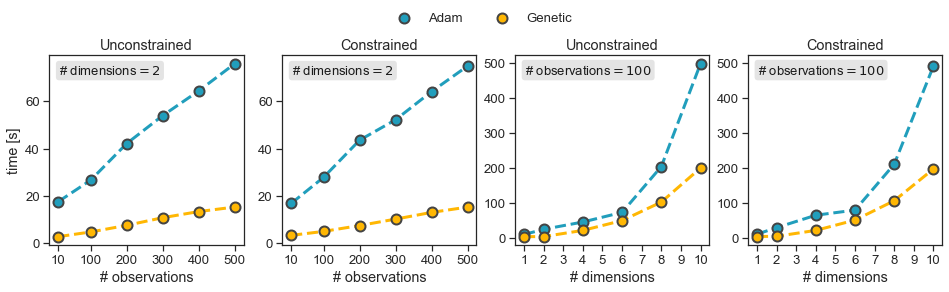

In [10]:
sns.set(style='ticks', context='notebook', font_scale=1.2)
    
def plot_scaling(data, ax=None, color='r', label='', skip=[]):
    
    if ax is None:
        fig, ax = plt.subplots()
        
    num = sorted(list(data.keys()))
    xvalues = []

    # parse data
    df = pd.DataFrame()
    for n in num:
        if n in skip:
            continue
        df.loc[:, n] = np.array([data[n][l] for l in [-1,0,1]]).flatten()
        xvalues.append(n)

    # get stats
    mean = np.mean(df.to_numpy(), axis=0)

    # plot
    ax.plot(xvalues, mean, color=color, linewidth=3, linestyle='--', zorder=0)
    ax.scatter(xvalues, mean, color=color, s=100, edgecolor='#444444', linewidth=2, zorder=1, label=label)


# variable OBS
with open('num_obs-unconstrained-adam.pkl', 'rb') as content:
    data0 = pickle.load(content)
with open('num_obs-unconstrained-genetic.pkl', 'rb') as content:
    data1 = pickle.load(content)
with open('num_obs-constrained-adam.pkl', 'rb') as content:
    data2 = pickle.load(content)
with open('num_obs-constrained-genetic.pkl', 'rb') as content:
    data3 = pickle.load(content)
# variable DIM
with open('dims-unconstrained-adam.pkl', 'rb') as content:
    data4 = pickle.load(content)
with open('dims-unconstrained-genetic.pkl', 'rb') as content:
    data5 = pickle.load(content)
with open('dims-constrained-adam.pkl', 'rb') as content:
    data6 = pickle.load(content)
with open('dims-constrained-genetic.pkl', 'rb') as content:
    data7 = pickle.load(content)

num_obs = list(data0.keys()) 
num_dim = list(data4.keys()) 

# ------
# Figure 
# ------

#fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(16,3.5))
fig = plt.figure(figsize=(16,3.5))
ax1 = plt.subplot(141)
ax2 = plt.subplot(142, sharey=ax1)
ax3 = plt.subplot(143)
ax4 = plt.subplot(144, sharey=ax3)

# variable OBS
plot_scaling(data=data0, ax=ax1, color='#219ebc', label='Adam')
plot_scaling(data=data1, ax=ax1, color='#ffb703', label='Genetic')
plot_scaling(data=data2, ax=ax2, color='#219ebc', label='Adam')
plot_scaling(data=data3, ax=ax2, color='#ffb703', label='Genetic')
# variable DIM
plot_scaling(data=data4, ax=ax3, color='#219ebc', label='Adam', skip=[3])
plot_scaling(data=data5, ax=ax3, color='#ffb703', label='Genetic', skip=[3])
plot_scaling(data=data6, ax=ax4, color='#219ebc', label='Adam', skip=[3])
plot_scaling(data=data7, ax=ax4, color='#ffb703', label='Genetic', skip=[3])

ax1.set_ylabel('time [s]')
for ax in [ax1, ax2]:
    ax.set_xlabel('# observations')
    ax.set_xticks([10,100,200,300,400,500])

for ax in [ax3, ax4]:
    ax.set_xlabel('# dimensions')
    ax.set_xticks([1,2,3,4,5,6,7,8,9,10])

ax1.set_title('Unconstrained')
ax2.set_title('Constrained')
ax3.set_title('Unconstrained')
ax4.set_title('Constrained')

fc = matplotlib.colors.to_rgba('lightgrey')
fc = fc[:-1] + (0.6,) # change the alpha value  
for ax in [ax1, ax2]:
    ax.text(0.05, 0.9, transform=ax.transAxes, s='# dimensions$ = 2$', color='k', fontsize=13,
            bbox=dict(facecolor=fc, edgecolor='none', boxstyle='round,pad=0.25'))
for ax in [ax3, ax4]:
    ax.text(0.05, 0.9, transform=ax.transAxes, s='# observations$ = 100$', color='k', fontsize=13,
            bbox=dict(facecolor=fc, edgecolor='none', boxstyle='round,pad=0.25'))

#_ = ax2.legend(loc='upper left', bbox_to_anchor=(0.5, -0.2), frameon=False, ncol=2)
_ = ax2.legend(loc='lower left', bbox_to_anchor=(0.5, 1.1), frameon=False, ncol=2)

#plt.tight_layout()
fig.savefig('acquisition_optimizers_scaling.pdf', bbox_inches='tight')
fig.savefig('acquisition_optimizers_scaling.png', dpi=300, bbox_inches='tight')

In [2]:
# Golem colormap
_reference_colors = ['#008080', '#70a494', '#b4c8a8', '#f6edbd', '#edbb8a', '#de8a5a','#ca562c']
_cmap = LinearSegmentedColormap.from_list('golem', _reference_colors)
_cmap_r = LinearSegmentedColormap.from_list('golem_r', _reference_colors[::-1])
plt.register_cmap(cmap=_cmap)
plt.register_cmap(cmap=_cmap_r)

def get_golem_colors(n):
    _cmap = plt.get_cmap('golem')
    return [_cmap(x) for x in np.linspace(0, 1, n)]

def plot_contour(ax, X0, X1, y, xlims, ylims, vlims=[None, None], alpha=0.5, contour_lines=True, contour_labels=True, 
                 labels_fs=8, labels_fmt='%d', n_contour_lines=8, contour_color='k', contour_alpha=1, cbar=False, cmap='golem'):
    # background surface
    if contour_lines is True:
        contours = ax.contour(X0, X1, y, n_contour_lines, colors=contour_color, alpha=contour_alpha, linestyles='dashed')
        if contour_labels is True:
            _ = ax.clabel(contours, inline=True, fontsize=labels_fs, fmt=labels_fmt)
    mappable = ax.imshow(y, extent=[xlims[0],xlims[1],ylims[0],ylims[1]], 
                         origin='lower', cmap=cmap, alpha=alpha, vmin=vlims[0], vmax=vlims[1])
    
    if cbar is True:
        cbar = plt.colorbar(mappable=mappable, ax=ax, shrink=0.5)
        
    return mappable

def plot_2d_surface(f, f_constr, ax=None, N=100):
    
    if ax is None:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

    x0 = np.linspace(0,1,N)
    x1 = np.linspace(0,1,N)
    X0, X1 = np.meshgrid(x0,x1)
    X = np.array([X0.flatten(), X1.flatten()]).T
    y = f(X).flatten()
    Y = np.reshape(y, newshape=np.shape(X0))

    _ = plot_contour(ax, X0, X1, Y, xlims=[0,1], ylims=[0,1], alpha=1, contour_lines=True, contour_labels=True, 
                 labels_fs=8, labels_fmt='%.2f', n_contour_lines=8, contour_alpha=0.8, cbar=True, cmap='golem')
    
    y_feas = f_constr(X)
    Y_feas = np.reshape(y_feas, newshape=np.shape(X0))
    ax.imshow(Y_feas, extent=[0,1,0,1], origin='lower', cmap='gray', alpha=0.5, interpolation='none')

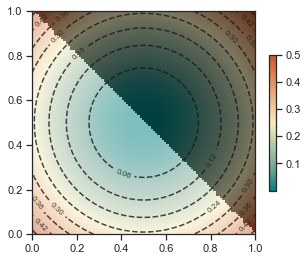

In [46]:
def objective_func(X):
    # any dimension
    X = np.array(X)
    y = []
    for Xi in X:
        yi = np.sum((Xi - 0.5)**2)
        y.append(yi)
    return np.array(y)


def known_constraints(params):
    X = [params[key] for key in params.keys()]
    if np.sum(X) > 1.0:
        return False
    return True


def eval_known_constraints(X):
    X = np.array(X)
    y = []
    for Xi in X:
        params = {}
        for j, Xij in enumerate(Xi):
            params[f'x{j}'] = Xij
        yi = known_constraints(params)
        y.append(yi)
    return np.array(y)


def merit_function(param):
    X = [params[key] for key in params.keys()]
    param['obj'] = objective_func([X])[0]
    return param


def build_observations(N, dim=2):
    observations = []
    for i in range(N):
        d = {}
        for j in range(dim):
            d[f'x{j}'] = np.random.uniform(low=0, high=1)
        d = merit_function(d)
        observations.append(d)
    return observations


plot_2d_surface(f=objective_func, f_constr=eval_known_constraints, ax=None, N=100)

## Without constraints

In [29]:
optimizer = "genetic"

config = {
     "general": {
             "batches": 1,
             "parallel": False,
             "boosted":  False,
             "sampling_strategies": 1,
             "random_seed":42,
             "acquisition_optimizer": optimizer
                },
    "parameters": [
        {"name": "x0", "type": "continuous", "low": 0., "high": 1.},
        {"name": "x1", "type": "continuous", "low": 0., "high": 1.}
    ],
    "objectives": [
        {"name": "obj", "goal": "min"}
    ]
}

gryffin = Gryffin(config_dict=config, known_constraints=None)

In [30]:
observations = build_observations(N=10)
timings = []

# 10 x 3 = 30 samples
for repeat in range(10):  
    for strategy in [-1, 0 , 1]:
        _ = gryffin.recommend(observations=observations, sampling_strategies=[strategy])
        t = gryffin.timings['Acquisition']['proposals_opt']
        timings.append(t)

[INFO] Acquisition ... [TIME]:  8.5461 ms  (random proposals) ...
[INFO] Acquisition ... running serial optimization for lambda strategy number 0 ...
[INFO] Acquisition ... [TIME]:  1.77 s  (optimizing proposals) ...
[INFO] Acquisition ... [TIME]:  1.78 s  (overall) ...
[INFO] SampleSelector ... running serial process for lambda strategy number 0 ...
[INFO] SampleSelector ... [TIME]:  604.5551 ms  (selecting proposals) ...
[INFO] Gryffin ... [MEM]:  0.0 GB, 340.0 MB, 848.0 kB ...
[INFO] Gryffin ... [TIME]:  4.94 s  (overall) ...
[INFO] Acquisition ... [TIME]:  8.5261 ms  (random proposals) ...
[INFO] Acquisition ... running serial optimization for lambda strategy number 0 ...
[INFO] Acquisition ... [TIME]:  2.47 s  (optimizing proposals) ...
[INFO] Acquisition ... [TIME]:  2.48 s  (overall) ...
[INFO] SampleSelector ... running serial process for lambda strategy number 0 ...
[INFO] SampleSelector ... [TIME]:  579.2346 ms  (selecting proposals) ...
[INFO] Gryffin ... [MEM]:  0.0 GB, 341

<AxesSubplot:ylabel='Density'>

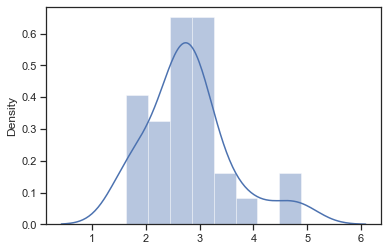

In [31]:
sns.distplot(timings)

In [32]:
np.mean(timings)

2.7946958859761555

## With constraints

In [33]:
optimizer = "genetic"

config = {
     "general": {
             "batches": 1,
             "parallel": False,
             "boosted":  False,
             "sampling_strategies": 1,
             "random_seed":42,
             "acquisition_optimizer": optimizer
                },
    "parameters": [
        {"name": "x0", "type": "continuous", "low": 0., "high": 1.},
        {"name": "x1", "type": "continuous", "low": 0., "high": 1.}
    ],
    "objectives": [
        {"name": "obj", "goal": "min"}
    ]
}

gryffin = Gryffin(config_dict=config, known_constraints=known_constraints)

In [34]:
observations = build_observations(N=10)
timings = []

# 10 x 3 = 30 samples
for repeat in range(1):  
    for strategy in [-1, 0 , 1]:
        _ = gryffin.recommend(observations=observations, sampling_strategies=[strategy])
        t = gryffin.timings['Acquisition']['proposals_opt']
        timings.append(t)

[INFO] Acquisition ... [TIME]:  39.9611 ms  (random proposals) ...
[INFO] Acquisition ... running serial optimization for lambda strategy number 0 ...
[INFO] Acquisition ... [TIME]:  2.51 s  (optimizing proposals) ...
[INFO] Acquisition ... [TIME]:  2.55 s  (overall) ...
[INFO] SampleSelector ... running serial process for lambda strategy number 0 ...
[INFO] SampleSelector ... [TIME]:  525.8608 ms  (selecting proposals) ...
[INFO] Gryffin ... [MEM]:  0.0 GB, 342.0 MB, 962.0 kB ...
[INFO] Gryffin ... [TIME]:  5.79 s  (overall) ...
[INFO] Acquisition ... [TIME]:  39.0489 ms  (random proposals) ...
[INFO] Acquisition ... running serial optimization for lambda strategy number 0 ...
[INFO] Acquisition ... [TIME]:  2.82 s  (optimizing proposals) ...
[INFO] Acquisition ... [TIME]:  2.86 s  (overall) ...
[INFO] SampleSelector ... running serial process for lambda strategy number 0 ...
[INFO] SampleSelector ... [TIME]:  591.4719 ms  (selecting proposals) ...
[INFO] Gryffin ... [MEM]:  0.0 GB, 3

In [7]:
# =========
# Functions
# =========
def objective_func(X):
    # any dimension
    X = np.array(X)
    y = []
    for Xi in X:
        yi = np.sum((Xi - 0.5)**2)
        y.append(yi)
    return np.array(y)


def known_constraints(params):
    X = np.array([params[key] for key in params.keys()])
    if any(X < 0.1) is True:
        return False
    return True


def eval_known_constraints(X):
    X = np.array(X)
    y = []
    for Xi in X:
        params = {}
        for j, Xij in enumerate(Xi):
            params[f'x{j}'] = Xij
        yi = known_constraints(params)
        y.append(yi)
    return np.array(y)


def merit_function(param):
    X = [param[key] for key in param.keys()]
    param['obj'] = objective_func([X])[0]
    return param


def build_observations(samples):
    observations = []
    for sample in samples:
        d = {}
        for i, xi in enumerate(sample):
            d[f'x{i}'] = xi
        d = merit_function(d)
        observations.append(d)
    return observations


# ====
# Main
# ====

def make_config(dim):
    parameters = []
    for i in range(dim):
        param = {"name": f"x{i}", "type": "continuous", "low": 0., "high": 1.}
        parameters.append(param)
    

    config = {
        "general": {
             "batches": 1,
             "num_cpus": 1,
             "boosted":  False,
             "caching": False,
             "save_database": False,
             "sampling_strategies": 1,
             "random_seed":42,
             "acquisition_optimizer": optimizer,
             "verbosity": 3
                },
        "parameters": parameters,
        "objectives": [{"name": "obj", "goal": "min"}]
    }

    return config

In [24]:
constrained = False
optimizer = "adam"

n_obs = 50
dim = 6

config = make_config(dim=dim)
if constrained is True:
    gryffin = Gryffin(config_dict=config, known_constraints=known_constraints)
    np.random.seed(42)  # fix seed so we always have the same samples
    samples = gryffin.random_sampler.draw(num=n_obs)
else:
    gryffin = Gryffin(config_dict=config, known_constraints=None)
    np.random.seed(42)
    samples = gryffin.random_sampler.draw(num=n_obs)
    
observations = build_observations(samples)
_ = gryffin.recommend(observations=observations, sampling_strategies=[-1])

⠙ Selecting best samples to recommend...

1 sample selected in 4.2 s

─────────────────────────────────── Summary ────────────────────────────────────

Memory usage: 0 GB, 489 MB, 197 kB

Overall time required: 29.8 s

===================================== End ======================================

In [21]:
objective_func([[1.0]*12])

array([3.])

In [22]:
observations

[{'x0': 0.37454012,
  'x1': 0.96958464,
  'x2': 0.031429186,
  'x3': 0.9082659,
  'x4': 0.64203167,
  'x5': 0.29444888,
  'obj': 0.6849139},
 {'x0': 0.9507143,
  'x1': 0.77513283,
  'x2': 0.6364104,
  'x3': 0.23956189,
  'x4': 0.084139965,
  'x5': 0.38509774,
  'obj': 0.5514194},
 {'x0': 0.7319939,
  'x1': 0.93949896,
  'x2': 0.31435597,
  'x3': 0.14489487,
  'x4': 0.16162871,
  'x5': 0.8511367,
  'obj': 0.645336},
 {'x0': 0.5986585,
  'x1': 0.89482737,
  'x2': 0.5085707,
  'x3': 0.48945275,
  'x4': 0.8985542,
  'x5': 0.316922,
  'obj': 0.35816985},
 {'x0': 0.15601864,
  'x1': 0.5979,
  'x2': 0.9075665,
  'x3': 0.9856505,
  'x4': 0.60642904,
  'x5': 0.16949275,
  'obj': 0.65043664},
 {'x0': 0.15599452,
  'x1': 0.9218742,
  'x2': 0.24929222,
  'x3': 0.24205527,
  'x4': 0.009197052,
  'x5': 0.55680126,
  'obj': 0.66982144},
 {'x0': 0.058083612,
  'x1': 0.088492505,
  'x2': 0.41038293,
  'x3': 0.67213553,
  'x4': 0.10147154,
  'x5': 0.9361548,
  'obj': 0.75134623},
 {'x0': 0.8661761,
  'x